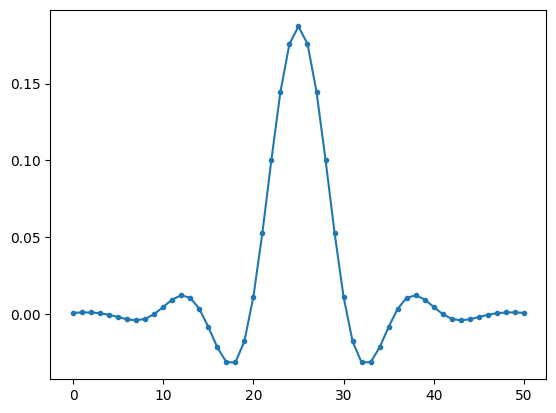

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_taps = 51 # it helps to use an odd number of taps, more sharp filter with increasing taps
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, fs=sample_rate)

# plot the impulse response
plt.plot(h, '.-')
plt.show()

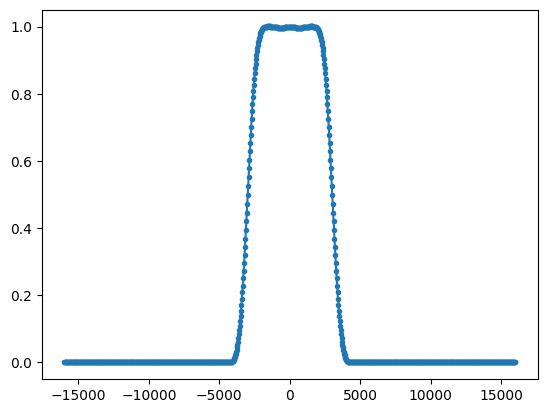

In [11]:
# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.plot(w, H, '.-')
plt.show()

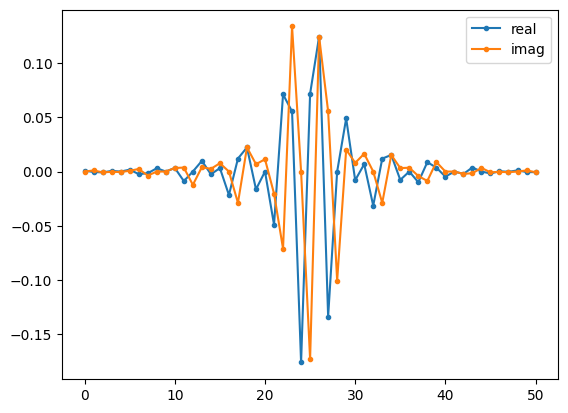

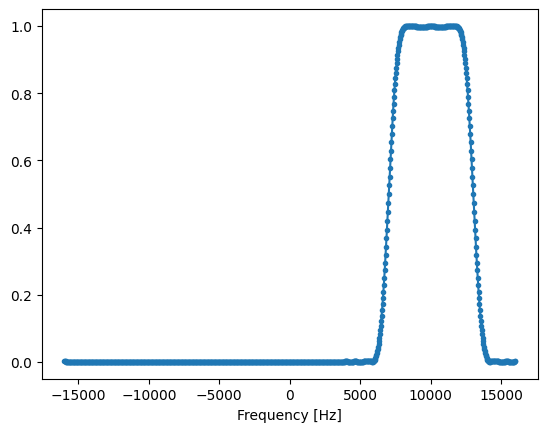

In [12]:
# (h was found using the first code snippet)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()

